**Importing Libraries**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import random


**Computing The Loss Function,Class Prediction Function**

In [13]:
#LR loss function
def loss(h , y) : 
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum()

#predicting class function
def predict(weights  , bias , X):
        w = np.dot(X , weights) + bias
        y_pred = 1/(1+np.exp(-w))
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]
        return binary_pred

#calculating true/false positives/negatives:
def evaluate(y_pred , y):
    k=0
    tp=0
    fp=0
    fn=0
    tn=0
    for x in y_pred :
        if x==1:
            if y[k] == 1:
                tp+=1
            else:
                fp+=1
        else:
            if y[k] == 1:
                fn+=1
            else:
                tn+=1
        k+=1
    return tp,fp,tn,fn
        

**LR using gradient decent **

In [14]:


def LogisticRegression(lr  , iterations  , X  , y) :
  
    rows , features  = X.shape #rows x cols
    weights = np.zeros(features)  #initialising weights
    bias = 0  #initialising bias
    y = y.reshape((y.shape[0],))
    
    l = []
    a = []
    #Gradient descent
    for i in range(iterations):
        w = np.dot(X , weights) + bias    #weight vector
        
        y_pred = 1/(1+np.exp(-w))    #predicting class
        
        #calculating weight and bias errors
        delta_w = np.dot(X.T , y_pred - y)
        delta_b = np.sum(y_pred - y)
        
        #updating weights and bias 
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
        
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]     #classifying class 
      
        if i%50 == 0 :
            l.append(loss(y_pred , y))     #appending loss
            a.append(((binary_pred == y).sum()/len(y)))     #appending accuracy
      
    return weights,bias,l,a
    

**LR using stochastic gradient decent **

In [15]:


def LogisticRegressionSGD(lr, iterations  , X  , y) :
    l=[]
    a=[]
    rows , features  = X.shape #rows x cols
    weights = np.zeros(features)    #initialising weights
    bias = 0    #initialising bias
    y = y.reshape((y.shape[0],))
    iter_no = 0
    
    #Stochastic Gradient descent
    for i in range(iterations):
         
        #chosing a random entry
        random_number = random.randint(0, len(y)-1)   
        x_b, y_b = X[random_number], y[random_number]

        w = np.dot(x_b, weights) + bias    #weight vector
        
        y_pred = 1/(1+np.exp(-w))    #predicting class
        
        #calculating weight and bias errors
        delta_w = np.dot(x_b.T , y_pred - y_b)
        delta_b = np.sum(y_pred - y_b)
        
        #updating weights and bias 
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
            
        binary_pred = predict(weights,bias,X)    #classifying class 
            
        iter_no+=1
            
        if iter_no%50==0:
            l.append(loss(y_pred , y_b))     #appending loss
            tp,fp,tn,fn = evaluate(binary_pred , y)   #calculating true/false positives/negatives
            a.append((tp+tn)/(tp+tn+fp+fn))     #appending accuracy
                
    return weights,bias,l,a      


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading and Standardisation of data**

In [6]:
#(x-mean)/SD

df = pd.read_csv('/content/drive/MyDrive/ML Assignment2/dataset_LR.csv')

col_names = np.array(df.columns)
col_names = col_names[:-1]
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col

df.head()

,attr1,attr2,attr3,attr4,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


**Creating lists to append them for calculation of averages**

In [7]:

Accuracy =[]
Accuracy_t =[]
AccuracySGD=[]
AccuracySGD_t=[]

Loss=[]
LossSGD =[]

Fscore = []
Fscore_t = []
FscoreSGD=[]
FscoreSGD_t=[]

Precision=[]
Precision_t=[]
PrecisionSGD =[]
PrecisionSGD_t =[]

Recall=[]
Recall_t=[]
RecallSGD=[]
RecallSGD_t=[]

wGD=[]
bGD=[]
wSGD=[]
bSGD=[]

for j in range(10):     
    lrate= 0.001
    no_iter=10000
    
        
    #read and create 70:30 train-test splits
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()

    #calling function return values
    weights,bias,los, acc = LogisticRegression(lrate , no_iter , np_X , np_y)
    wGD.append(weights)
    bGD.append(bias)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate , no_iter, np_X , np_y)
    wSGD.append(weightsSGD)
    bSGD.append(biasSGD)

    print(" ")
    print("=============================================Shuffle number :",j,"==============================")
    print("*********************************************Gradient Descent************************************")
    
    print("GD weights:",weights)
    print("GD bias:",bias)
    print("Loss :",los[-1])
    
    print("---------------------------------------------Training dataset-----------------------------------")
    
    predicted = predict(weights , bias , np_X)
    tp,fp,tn,fn = evaluate(predicted , np_y)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    
    #appending evaluation metrics list
    Accuracy.append(accuracy)
    Loss.append(los[-1])
    Fscore.append(f1)
    Precision.append(precision)
    Recall.append(recall)
    

    print("-----------------------------------------Testing dataset----------------------------------------")
    
    X_test = df_test.iloc[: , 0:4]
    y_test = df_test.iloc[: , -1:]

    np_X_t = X_test.to_numpy()
    np_y_t = y_test.to_numpy()
    np_y_t = np_y_t.reshape((np_y_t.shape[0],))
        
    predicted = predict(weights , bias , np_X_t)
    tp,fp,tn,fn = evaluate(predicted , np_y_t)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    
    #appending evaluation metrics list
    Accuracy_t.append(accuracy)
    Fscore_t.append(f1)
    Precision_t.append(precision)
    Recall_t.append(recall)
    
    print("***************************************Stochastic Gradient Descent************************************")
    
    print("SGD Weights : ",weightsSGD)
    print("SGD Bias : ",biasSGD)
    print("Loss :",lSGD[-1])

    
    print("---------------------------------------------Training dataset-----------------------------------")
    
    predicted = predict(weightsSGD , biasSGD , np_X)
    tp,fp,tn,fn = evaluate(predicted , np_y)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
        
    #appending evaluation metrics list
    AccuracySGD.append(accuracy)
    LossSGD.append(lSGD[-1])
    FscoreSGD.append(f1)
    PrecisionSGD.append(precision)
    RecallSGD.append(recall)
    
    print("-----------------------------------------Testing dataset----------------------------------------")
    predicted = predict(weightsSGD , biasSGD , np_X_t)
    tp,fp,tn,fn = evaluate(predicted , np_y_t)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    
    #appending evaluation metrics lists
    AccuracySGD_t.append(accuracy)
    FscoreSGD_t.append(f1)
    PrecisionSGD_t.append(precision)
    RecallSGD_t.append(recall)
    

 
=============================================Shuffle number : 0 ==============================
*********************************************Gradient Descent************************************
GD weights: [-11.22187435 -12.24908183 -11.16349886  -0.02905695]
GD bias: -5.2038560342463205
Loss : 22.39695376468444
---------------------------------------------Training dataset-----------------------------------
Recall : 0.9928057553956835
Precision : 0.981042654028436
F1 score : 0.9868891537544697
Accuracy :  0.9885416666666667
-----------------------------------------Testing dataset----------------------------------------
Recall : 0.9896373056994818
Precision : 0.9896373056994818
F1 score : 0.9896373056994817
Accuracy :  0.9902912621359223
 
***************************************Stochastic Gradient Descent************************************
SGD Weights :  [-1.52593403 -0.89011489 -0.3921367   0.00161728]
SGD Bias :  -0.2695095949720452
Loss : 0.5165829474900332
------------------------

**Calculating mean weights,bias GD**

In [8]:
final_wGD=[0,0,0,0]

for i in range(10):
    final_wGD=final_wGD+wGD[i]
    
final_wGD=final_wGD/10
final_bGD=mean(bGD)

**Calculating mean weights,bias SGD**

In [9]:
final_wSGD=[0,0,0,0]

for i in range(10):
    final_wSGD=final_wSGD+wSGD[i]
    
final_wSGD=final_wSGD/10
final_bSGD=mean(bSGD)


In [10]:
print("======================================Average values :======================================")

print(" ")
print("......................................Gradient Decent...................................... ")
print(" ")

print("GD weights: ",final_wGD)
print("GD bias: ",final_bGD)
print("Loss :",mean(Loss))
print(" ")

print("_________________Training GD___________________")
print("Accuracy :" ,mean(Accuracy))
print("Precision :",mean(Precision))
print("Recall :",mean(Recall))
print("F score :",mean(Fscore))

print(" ")
print("_________________Testing GD___________________")
print("Accuracy :" ,mean(Accuracy_t))
print("Precision :",mean(Precision_t))
print("Recall :",mean(Recall_t))
print("F score :",mean(Fscore_t))

print(" ")
print("................................Stochastic Gradient Decent................................ ")
print(" ")

print("SGD weights: ",final_wSGD)
print("SGD bias: ",final_bSGD)
print("Loss :",mean(LossSGD))
print(" ")

print("_________________Training SGD___________________")
print("Accuracy :" ,mean(AccuracySGD))
print("Precision :",mean(PrecisionSGD))
print("Recall :",mean(RecallSGD))
print("F score :",mean(FscoreSGD))

print(" ")
print("_________________Testing SGD___________________")
print("Accuracy :" ,mean(AccuracySGD_t))
print("Precision :",mean(PrecisionSGD_t))
print("Recall :",mean(RecallSGD_t))
print("F score :",mean(FscoreSGD_t))

======================================Average values :======================================
 
......................................Gradient Decent...................................... 
 
GD weights:  [-10.92675355 -12.29128045 -11.12327946  -0.26265009]
GD bias:  -5.073049046865243
Loss : 20.598046227366456
 
_________________Training GD___________________
Accuracy : 0.9901041666666667
Precision : 0.984894527609324
Recall : 0.9929552230158247
F score : 0.9889057438089841
 
_________________Testing GD___________________
Accuracy : 0.9883495145631068
Precision : 0.9825143350899199
Recall : 0.9919297428691234
F score : 0.9871517423758833
 
................................Stochastic Gradient Decent................................ 
 
SGD weights:  [-1.51076766 -0.90308346 -0.4281376  -0.01658936]
SGD bias:  -0.2522394041605562
Loss : 0.3803765146869496
 
_________________Training SGD___________________
Accuracy : 0.9303125
Precision : 0.9283956206720468
Recall : 0.9131885337650545
F scor

-----------------Learning Rate : 0.002 ---------------------
 
Final GD weights:  [-12.53978716 -14.35998534 -13.05680357  -0.53157607]
Final GD bias:  -5.987052742842129
GD accuracy:  0.9885416666666667


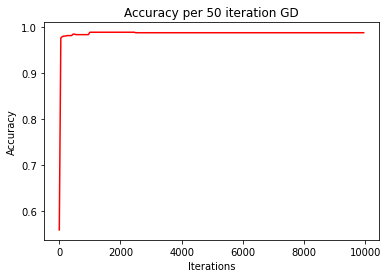

Final SGD weights:  [-2.06576115 -1.34847752 -0.95808907  0.04193729]
Final SGD bias:  -0.34161050455333003
SGD accuracy:  0.959375


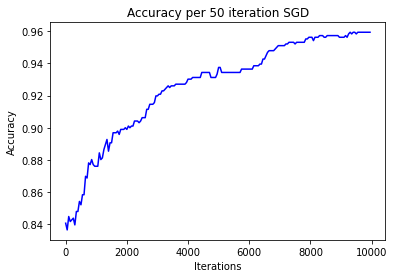

-----------------Learning Rate : 0.0002 ---------------------
 
Final GD weights:  [-7.05341301 -7.72509585 -6.98070543  0.02715194]
Final GD bias:  -2.857036477173407
GD accuracy:  0.9885416666666667


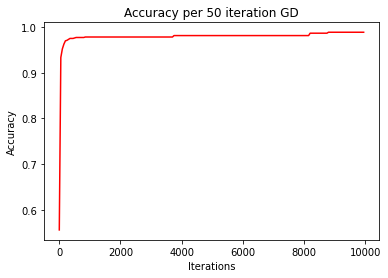

Final SGD weights:  [-0.54519101 -0.31135257  0.02473814 -0.02302347]
Final SGD bias:  -0.10392806812544982
SGD accuracy:  0.8708333333333333


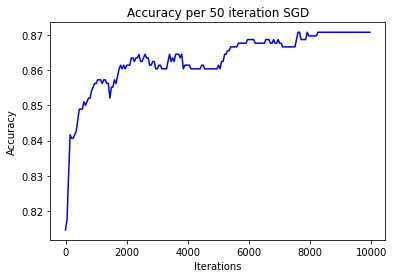

-----------------Learning Rate : 2e-05 ---------------------
 
Final GD weights:  [-4.07292764 -3.85381162 -3.59503798  0.28604037]
Final GD bias:  -0.9498329148474322
GD accuracy:  0.9802083333333333


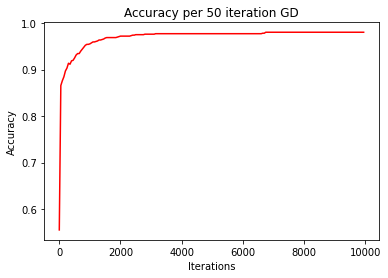

Final SGD weights:  [-0.06839715 -0.04270911  0.01152766 -0.00147009]
Final SGD bias:  -0.00988455951828226
SGD accuracy:  0.8541666666666666


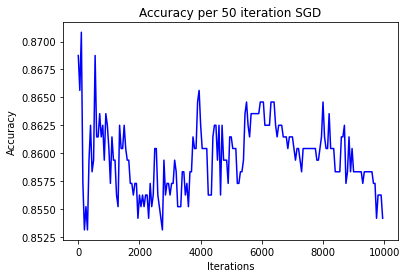

In [11]:
#for 3 different learning rates

LearningRate = [0.002 , 0.0002 , 0.00002]

for lrate in LearningRate :
    print('-----------------Learning Rate :',lrate,'---------------------')
    print(' ')
    
    #reading, shuffling and making 70:30 split
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()
    
    #calling function return values
    weights , bias , los, acc= LogisticRegression(lrate , no_iter , np_X , np_y)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate ,no_iter , np_X , np_y)

    iter = []
    for i in range(len(los)):
        iter.append(i*50)
 
    print("Final GD weights: ",weights)
    print("Final GD bias: ",bias)
    print("GD accuracy: ",(acc[-1]))
    plt.plot(iter,acc,label="Gradient Descent",color='blue')
    plt.title("Accuracy per 50 iteration GD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()
        

    print("Final SGD weights: ",weightsSGD)
    print("Final SGD bias: ",biasSGD)
    print("SGD accuracy: ",(aSGD[-1]))
    plt.plot(iter,aSGD,label="Stochastic Gradient Descent",color='red')
    plt.title("Accuracy per 50 iteration SGD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()



    